<a href="https://colab.research.google.com/github/sudeepkanthala/ICP-4/blob/main/ICP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Data Manipulation**

         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


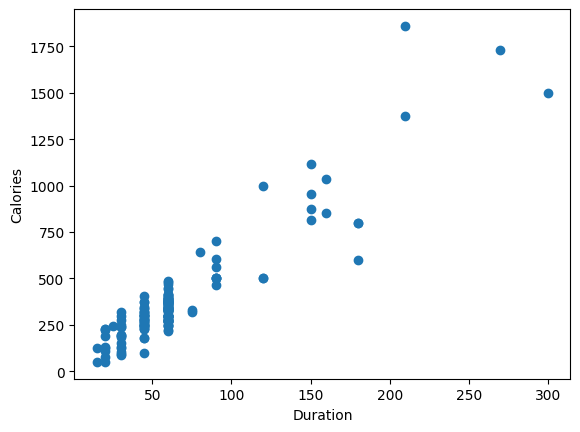

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

print(df.describe())

print(df.isnull().sum())
df['Calories'] = df['Calories'].fillna(df['Calories'].mean())

df_agg = df.agg({'Duration': ['min', 'max', 'count','mean'],
                 'Pulse': ['min', 'max', 'count','mean']})

df_500_1000 = df[(df['Calories'] > 500) & (df['Calories'] < 1000)]

df_filter = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]

df_modified = df.drop(columns=['Maxpulse'])

del df['Maxpulse']

df['Calories'] = df['Calories'].astype(int)

plt.scatter(df['Duration'], df['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.show()

**2. Linear Regression**

MSE: 35301898.887134895


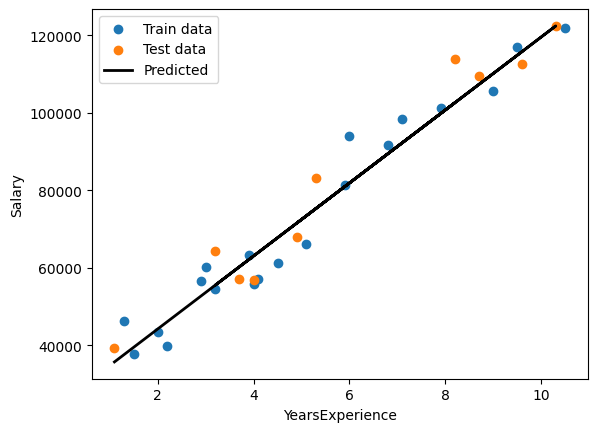

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/Salary_Data.csv')

# Split data into train and test
X = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

# Plot
plt.scatter(X_train, y_train, label='Train data')
plt.scatter(X_test, y_test, label='Test data')
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Predicted')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()